# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


# Load Dataset

In [ ]:
ticker_symbol="DX-Y.NYB"
ticker=yf.Ticker(ticker_symbol)
df=ticker.history(period="5y").reset_index(drop=False)
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


# Removal of some columns

In [ ]:
df=df.drop(['Volume', 'Dividends','Stock Splits'],axis=1)
df

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003


# Plot tickers

In [ ]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
fig.show()

# Stationary or non Statiοnary Timeseries

Από το γράφημα παρατηρούμε ότι οι χρονοσειρές είναι μη στατικές καθώς οι τιμές αλλάζουν σημαντικά με τον χρόνο και ακολουθούν ένα μοτίβο ανοδικής/καθοδικής πορείας σε συγκεκριμένο χρονικο διάστημα. Επίσης οι τιμές των χρονοσειρών δεν είναι κοντά στην μέση τιμή.

# Training a Regressor on Non-Stationary Time Series

Αν εκπαιδεύσουμε έναν regressor σε αυτά τα δεδομένα το μοντέλο θα κάνει ανακριβείς προβλέψεις γιατί θα έχει μάθει σχέσεις που ισχύουν μόνο σε ένα συγκεκριμένο χρονικό διάστημα. Κατά την εκπαίδευση, το μοντέλο ψάχνει σχέσεις μεταξύ των δεδομένων.Αυτό λειτουργεί καλά αν οι σχέσεις των μεταβλητών παραμένουν σταθερές με τον χρόνο. Ο regressor δεν μπορεί να μάθει μια σταθερή σχέση μεταξύ των δεδομένων  όταν οι ίδιες εισόδοι οδηγούν σε διαφορετικά αποτελέσματα ανάλογα με το πότε εμφανίζονται. Έτσι οι προβλέψεις του μοντέλου θα είναι τυχαίες.

# Finding function f(ot,ht,lt,ct)=ct+1

Αν μπορούσε να υπάρξει μια τέτοια συνάρτηση τότε ένας regressor θα μπορούσε να λειτουργήσει με αυτά τα δεδομένα χωρίς προβλήματα.'Ομως δεν είναι δυνατή η εύρεση μιας τέτοιας συνάρτησης γιατί η σχέση μεταξύ των μεταβλητών δεν παραμένει σταθερή στο χρόνο. Οι χρονοσειρές είναι μη στατικές,και επομένως ένα μοντέλο  που βασίζεται μόνο στα σημερινά δεδομένα δεν μπορεί να προβλέψει σωστά την αυριανή τιμή Close.

# Random splitting of data into train-test

Δεν έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων σε train–test,
γιατί στις χρονοσειρές τα δεδομένα έχουν χρονολογική εξάρτηση, δηλαδή η τιμή της μιας μέρας εξαρτάται από τις προηγούμενες. Αν ανακατέψουμε τις ημερομηνίες,το μοντέλο μπορεί να εκπαιδευτεί σε μελλοντικά δεδομένα και να ελεγχθεί σε παλαιότερα το οποίο δεν το θέλουμε.Ο σωστός τρόπος είναι ο χρονικός διαχωρισμός,όπου το μοντέλο εκπαιδεύεται σε παλαιότερα δεδομένα (π.χ. πριν το 2025) και ελέγχεται στα πιο πρόσφατα (π.χ. το 2025).

# Split Train-Test Dataframes

In [ ]:
train=df[df['Date']<'2025-01-01 00:00:00']
test=df[df['Date']>='2025-01-01 00:00:00']
test=test.drop('Date',axis=1)
train=train.drop('Date',axis=1)
train

,Open,High,Low,Close
0,93.339996,93.550003,92.489998,92.529999
1,92.570000,92.820000,92.180000,92.230003
2,92.239998,92.959999,92.129997,92.730003
3,92.760002,92.970001,92.599998,92.750000
4,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...
1039,108.160004,108.300003,107.919998,108.260002
1040,108.169998,108.300003,108.029999,108.129997
1041,108.080002,108.199997,107.870003,108.000000
1042,108.010002,108.379997,107.739998,108.129997


# Function that creates timeframes

In [ ]:
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()

    for i in range(data_df.shape[0] - n ):

        end = i + n
        timeframes.append(data_array[i: end])
        timeframe_targets.append(data_array[end][3])

    return np.array(timeframes), np.array(timeframe_targets)


inputs, targets = create_timeframes(train, 5)
inputs.shape,targets.shape

((1039, 5, 4), (1039,))

# Creat timeframes for Train-Test dataframes

In [ ]:
x_train, y_train = create_timeframes(train, 5)
x_test, y_test = create_timeframes(test, 5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1039, 5, 4), (1039,), (208, 5, 4), (208,))

# Flatten timeframes

In [ ]:
n = 5
num_features = train.shape[1]

x_train_flat = x_train.reshape((x_train.shape[0], n*num_features))
x_test_flat = x_test.reshape((x_test.shape[0], n*num_features))
x_train_flat.shape, x_test_flat.shape,x_train_flat[0]

((1039, 20),
 (208, 20),
 array([93.33999634, 93.55000305, 92.48999786, 92.52999878, 92.56999969,
        92.81999969, 92.18000031, 92.23000336, 92.23999786, 92.95999908,
        92.12999725, 92.73000336, 92.76000214, 92.97000122, 92.59999847,
        92.75      , 92.69999695, 93.20999908, 92.61000061, 93.04000092]))

# Create and train a linear Regression Model

In [ ]:
linearModel=LinearRegression()
linearModel.fit(x_train_flat,y_train)

LinearRegression()

# Create and train a Random Forest Regressor model

In [ ]:
randomForest=RandomForestRegressor(random_state=0)
randomForest.fit(x_train_flat,y_train)

RandomForestRegressor(random_state=0)

# Create and train a Bagging Regressor model

In [ ]:
bagging= BaggingRegressor(estimator=LinearRegression(),random_state=0)
bagging.fit(x_train_flat,y_train)

BaggingRegressor(estimator=LinearRegression(), random_state=0)

# Create and train a StackingRegressor model

In [ ]:
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=0))
]
stacking = StackingRegressor(estimators=estimators)
stacking.fit(x_train_flat,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor(random_state=0))])

## A function that calculates the MAE will accept the model as an argument and return the MAE in train and test.

In [ ]:
def mae(model):
 y_pred_train = model.predict(x_train_flat)
 y_pred_test = model.predict(x_test_flat)
 train_mae=mean_absolute_error(y_train, y_pred_train)
 test_mae=mean_absolute_error(y_test, y_pred_test)
 return train_mae,test_mae

## Evaluate models

In [ ]:
mae_train =[]
mae_test=[]
models=[linearModel,randomForest,bagging,stacking]
for model in models:
  model_mae=mae(model)

  mae_train.append(model_mae[0])
  mae_test.append(model_mae[1])

# A single bar plot for the MAE of models in train and test

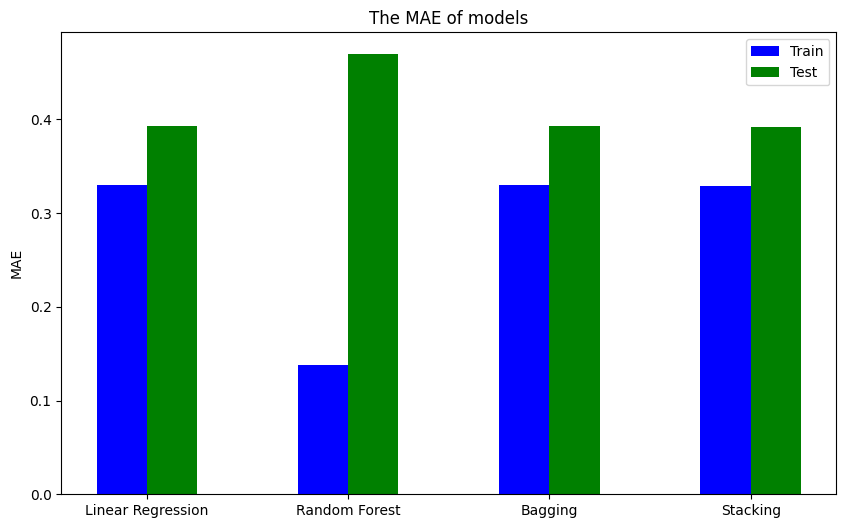

In [ ]:
names=['Linear Regression', 'Random Forest','Bagging', 'Stacking']
x = np.arange(len(names))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width/2, mae_train, width, label='Train', color='blue')
plt.bar(x + width/2, mae_test, width, label='Test', color='green')

plt.xticks(x, names)
plt.ylabel("MAE")
plt.title("Τhe ΜΑΕ of models")
plt.legend()
plt.show()


*   Linear Regression: Η σχέση μεταξύ χαρακτηριστικών και τιμής στόχου  μπορεί να παρασταθεί με μια εξίσωση ευθείας γραμμής y=wo+x*w(x και w διανύσματα).Στην οποία πρέπει να υπολογιστούν τα βάρη  w  από τα δεδομένα εκπαίδευσης.Το Ζητούμενο είναι η ευθεία να είναι όσο το δυνατόν πιο κοντά στα δεδομένα.

*   Random Forest: Πολλαπλά δέντρα αποφάσεων εκπαιδεύονται σε διάφορους συνδυασμούς δεδομένων και χαρακτηριστικών.Η πρόβλεψη γίνεται με βάση την επικρατέστερη απόφαση των  δένδρων για την περίπτωση ταξινόμησης ή με βάση τη μέση τιμή της αριθμητικής πρόβλεψης κάθε δένδρου, για την περίπτωση της παρεμβολής

*   Bagging: Το Bagging αρχικά δημιουργεί τυχαία πολλά διαφορετικά σύνολα   
            δεδομένων από το αρχικό μέσω "Δειγματοληψίας με Επανατοποθέτηση".Στη συνέχεια εφαρμόζει το μοντελό που έχει επιλεχθεί σε όλα τα νέα σύνολα δεδομένων και παράγει αντίστοιχες προβλέψεις. Για τη διαδικασία πρόβλεψης λαμβάνουμε υπόψη τις αποφάσεις όλων των μοντέλων.

*   Stacking: Χρησιποιείται για τον συνδυασμό πρόβλεψεων που προέκυψαν από διαφορετικά μοντέλα. Στη συνέχεια, εκπαιδεύει ένα μετα-μοντέλο ώστε να αξιοποιήσει αυτές τις προβλέψεις και να εκτιμήσει το τελικό αποτέλεσμα.


